In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("Dataset 2.csv")

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
8795,13,63,23,31.391055,51.453392,9.181497,42.440543,groundnuts
8796,31,55,17,29.923445,64.416451,8.898774,70.104721,groundnuts
8797,42,51,18,26.608803,50.689086,8.880159,63.918765,groundnuts
8798,11,55,18,27.688200,48.261590,6.013664,38.532547,groundnuts
8799,25,55,22,33.191011,52.475590,6.727969,32.812965,groundnuts


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            8800 non-null   int64  
 1   P            8800 non-null   int64  
 2   K            8800 non-null   int64  
 3   temperature  8800 non-null   float64
 4   humidity     8800 non-null   float64
 5   ph           8800 non-null   float64
 6   rainfall     8800 non-null   float64
 7   label        8800 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 550.1+ KB


In [6]:
df.shape

(8800, 8)

In [7]:
corr_matrix = df.select_dtypes(include=['number']).corr()
print(corr_matrix)

                    N         P         K  temperature  humidity        ph  \
N            1.000000 -0.151694 -0.013823    -0.008321  0.256242  0.052610   
P           -0.151694  1.000000  0.599535    -0.071754 -0.269703 -0.065218   
K           -0.013823  0.599535  1.000000    -0.107355  0.094312 -0.090915   
temperature -0.008321 -0.071754 -0.107355     1.000000  0.225111 -0.004882   
humidity     0.256242 -0.269703  0.094312     0.225111  1.000000  0.018312   
ph           0.052610 -0.065218 -0.090915    -0.004882  0.018312  1.000000   
rainfall     0.096882 -0.094005 -0.078071    -0.042752  0.116706 -0.103675   

             rainfall  
N            0.096882  
P           -0.094005  
K           -0.078071  
temperature -0.042752  
humidity     0.116706  
ph          -0.103675  
rainfall     1.000000  


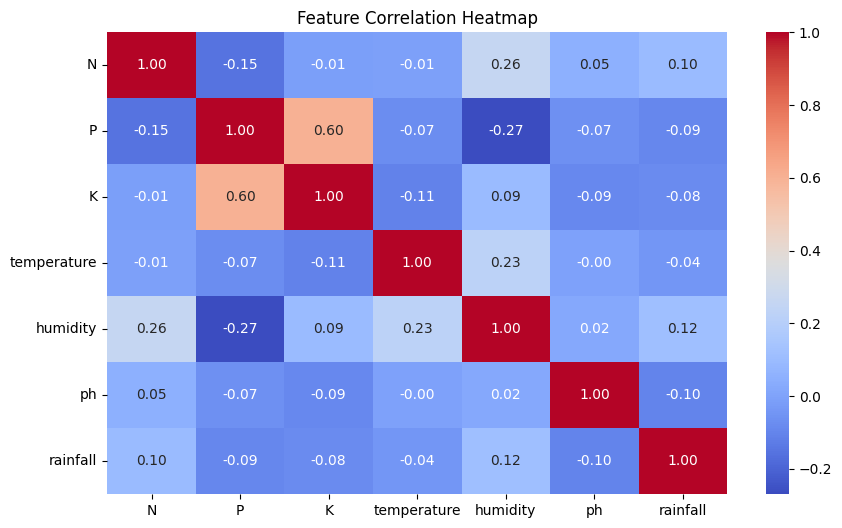

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [9]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'orange',
       'papaya', 'coconut', 'cotton', 'jute', 'coffee', 'groundnuts'],
      dtype=object)

In [10]:
df['label'].value_counts()

label
rice           400
maize          400
chickpea       400
kidneybeans    400
pigeonpeas     400
mothbeans      400
mungbean       400
blackgram      400
lentil         400
pomegranate    400
banana         400
mango          400
grapes         400
watermelon     400
muskmelon      400
orange         400
papaya         400
coconut        400
cotton         400
jute           400
coffee         400
groundnuts     400
Name: count, dtype: int64

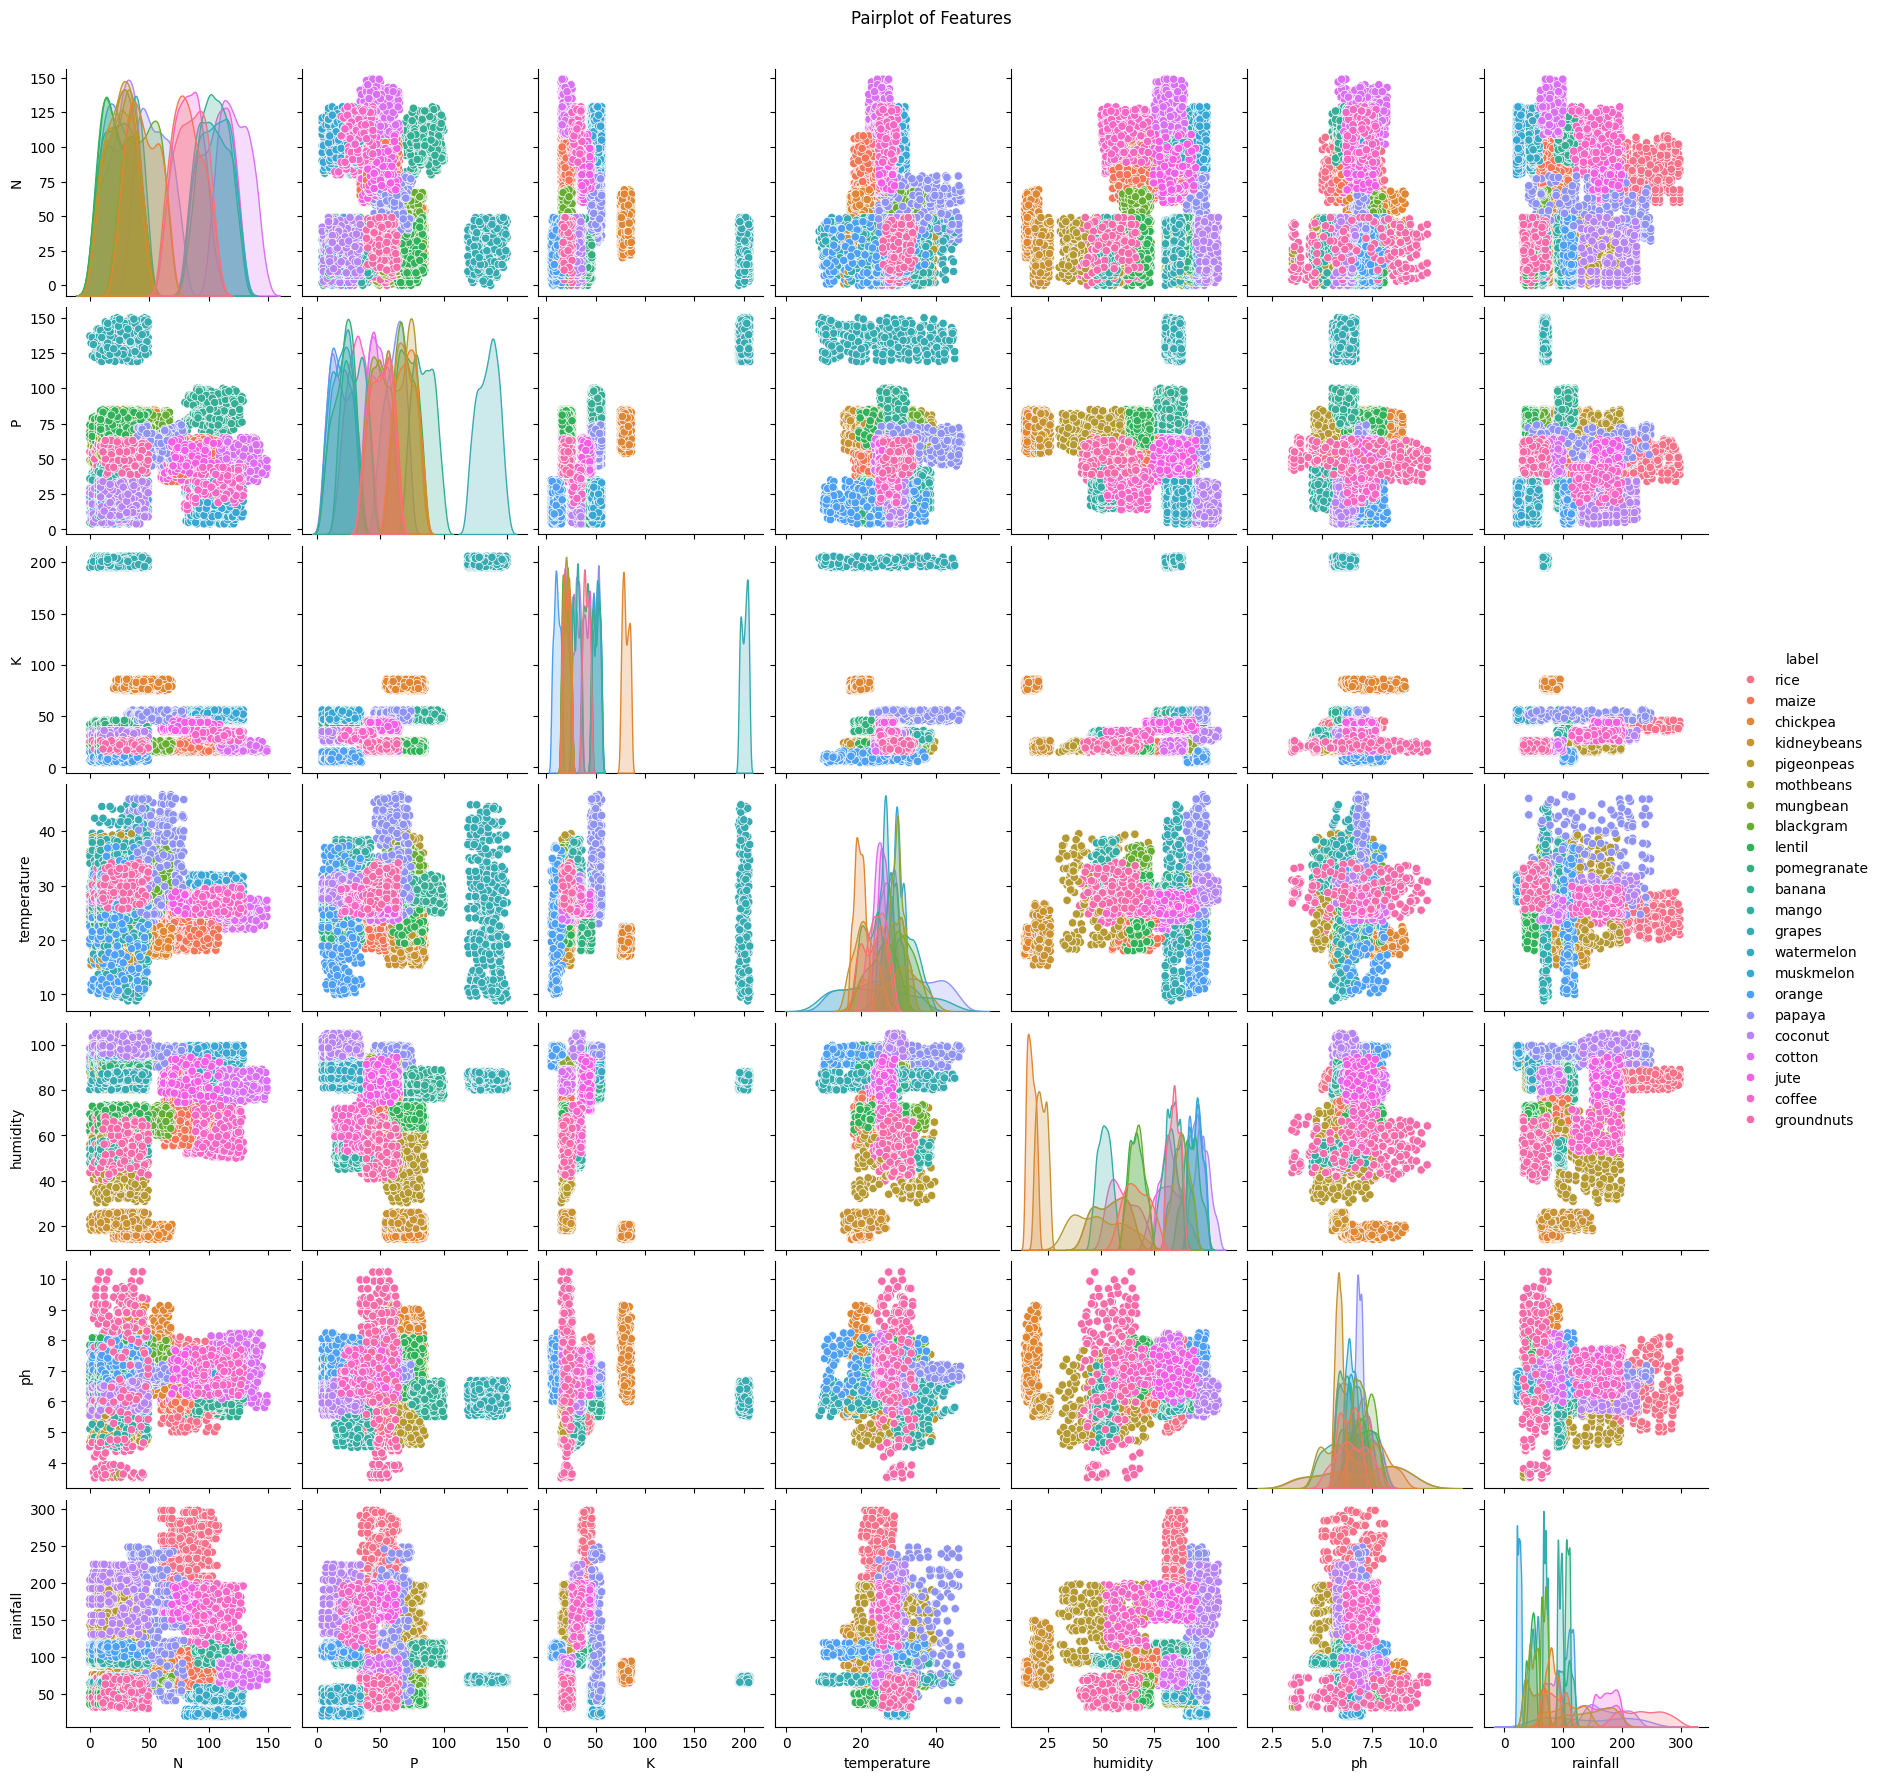

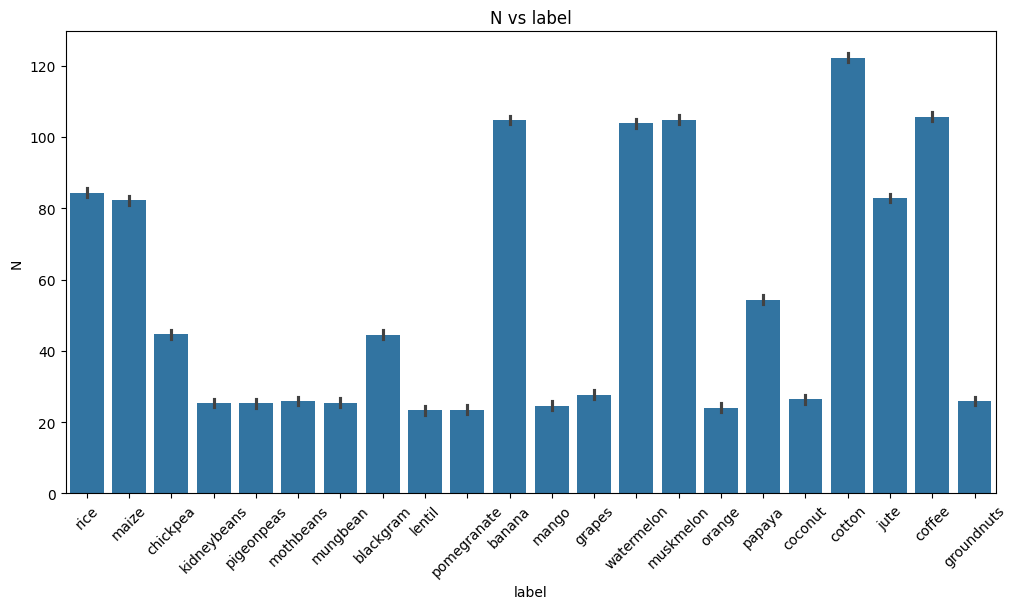

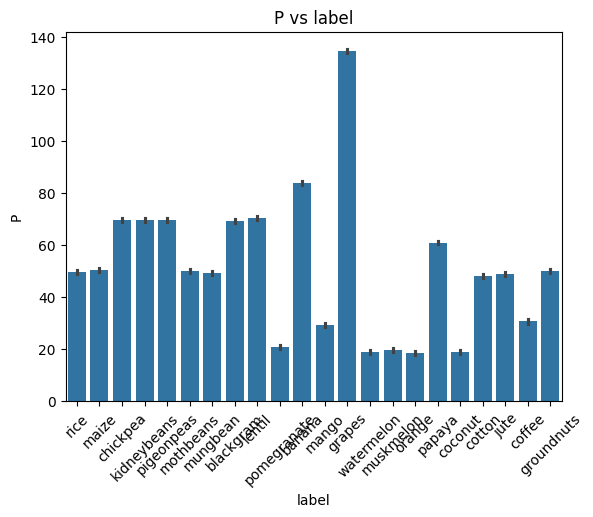

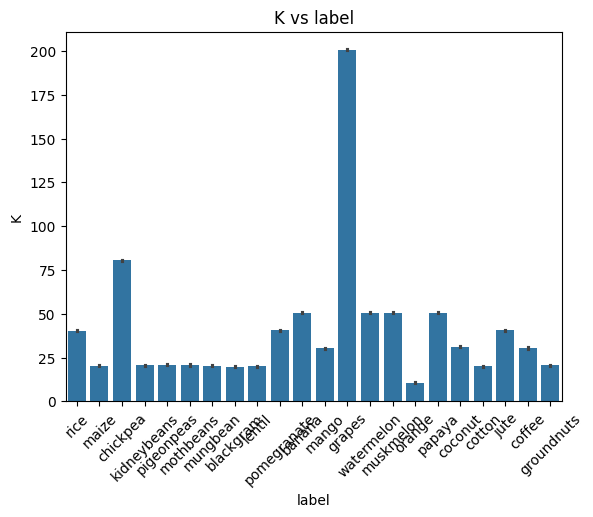

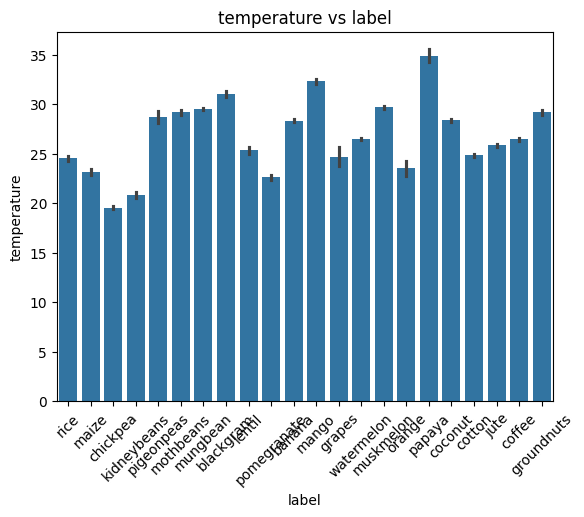

In [11]:
#  Class Distribution (Target variable)

target_col = df.columns[-1]  # assuming last column is target



#  Pairplot (only if dataset not too large)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if len(numeric_cols) > 1:
    sns.pairplot(df, hue=target_col, diag_kind="kde")
    plt.suptitle("Pairplot of Features", y=1.02)
    plt.show()


#  Barplot for Feature vs Target

plt.figure(figsize=(12, 6))
for col in numeric_cols[:4]:  # plot first 4 features
    sns.barplot(x=target_col, y=col, data=df)
    plt.title(f"{col} vs {target_col}")
    plt.xticks(rotation=45)
    plt.show()

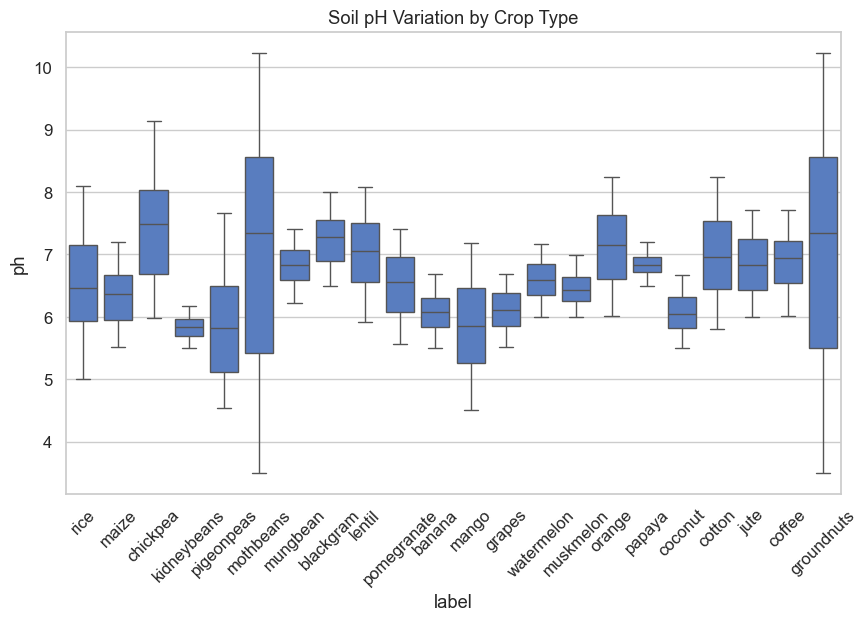

C:\Users\yogesh\AppData\Local\Temp\ipykernel_14792\1481181467.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_water.values, y=avg_water.index, palette="viridis")


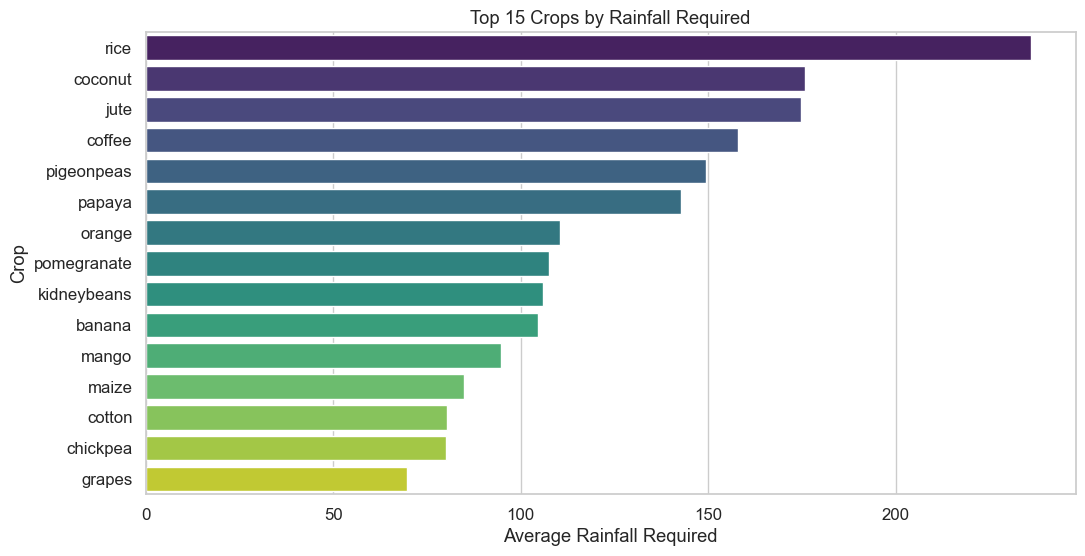

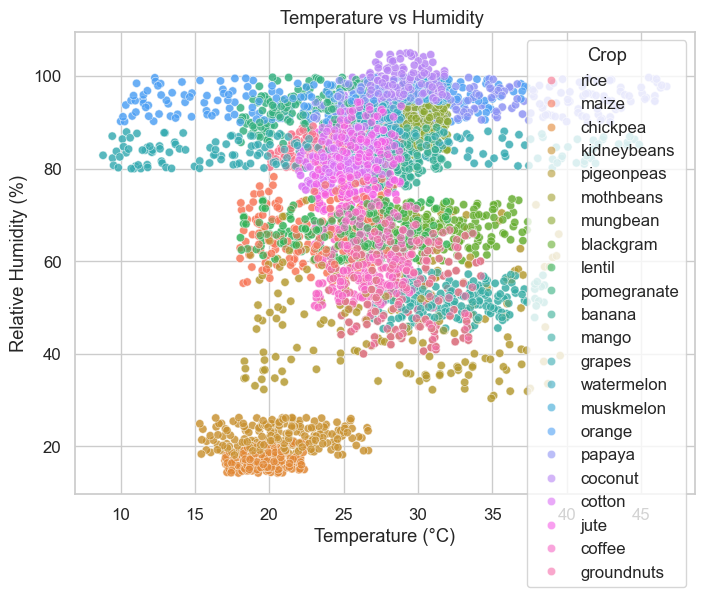

In [12]:

# Set Seaborn style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)



# 2. Average Soil pH by Crop Type
plt.figure(figsize=(10,6))
sns.boxplot(x="label", y="ph", data=df)
plt.title("Soil pH Variation by Crop Type")
plt.xticks(rotation=45)
plt.show()

# 3. Average Water Requirement per Crop
avg_water = df.groupby("label")["rainfall"].mean().sort_values(ascending=False)[:15]
plt.figure(figsize=(12,6))
sns.barplot(x=avg_water.values, y=avg_water.index, palette="viridis")
plt.title("Top 15 Crops by Rainfall Required")
plt.xlabel("Average Rainfall Required")
plt.ylabel("Crop")
plt.show()

# 4. Temperature vs Humidity Scatter Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x="temperature", y="humidity", hue="label", data=df, alpha=0.6)
plt.title("Temperature vs Humidity ")
plt.xlabel("Temperature (°C)")
plt.ylabel("Relative Humidity (%)")
plt.legend(title="Crop")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay


# 2️⃣ Separate features and target
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]  

# 3️⃣ Encode categorical labels (if needed)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 4️⃣ Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 5️⃣ Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6️⃣ Train SVM Model
model = SVC(kernel='rbf', C=1, gamma='scale')
model.fit(X_train_scaled, y_train)

# 7️⃣ Evaluate accuracy
y_pred = model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Model trained successfully! Accuracy: {acc*100:.2f}%")
error_rate = 1 - acc


print(f"❌ Error Rate: {error_rate*100:.2f}%")


✅ Model trained successfully! Accuracy: 93.24%
❌ Error Rate: 6.76%



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       0.99      0.99      0.99        85
           2       1.00      1.00      1.00        84
           3       1.00      1.00      1.00        78
           4       1.00      1.00      1.00        84
           5       0.98      0.98      0.98        66
           6       1.00      1.00      1.00        73
           7       0.48      0.41      0.45        94
           8       0.86      0.99      0.92        82
           9       1.00      1.00      1.00        70
          10       0.93      0.99      0.96        76
          11       0.99      0.99      0.99        81
          12       1.00      1.00      1.00        91
          13       0.40      0.44      0.42        82
          14       1.00      1.00      1.00        84
          15       1.00      1.00      1.00        77
          16       1.00      1.00      1.00        82
  

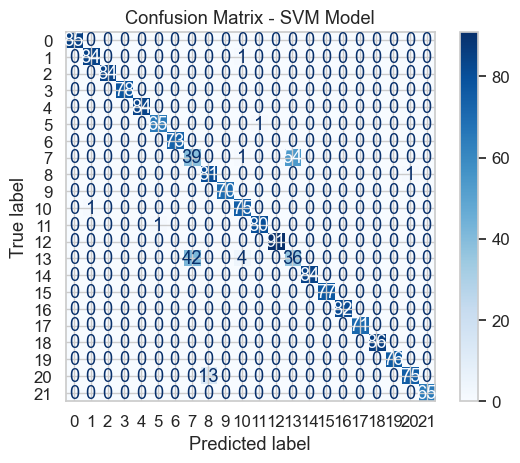

In [14]:
# Confusion Matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - SVM Model")
plt.show()

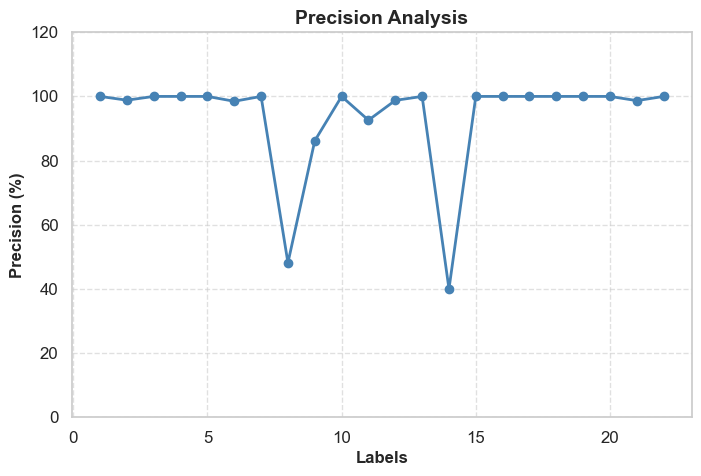

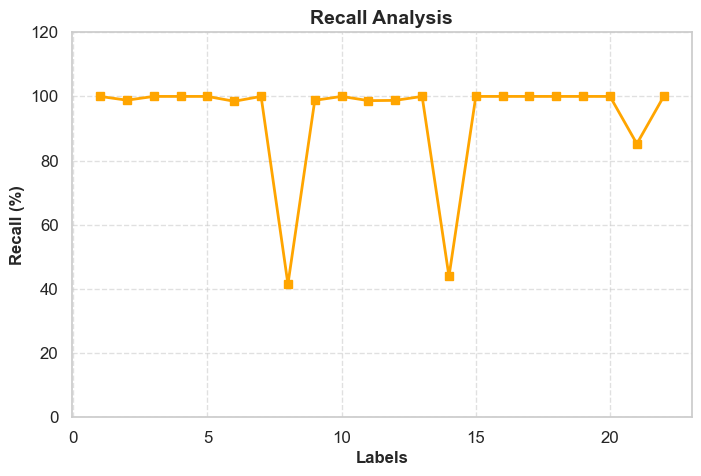

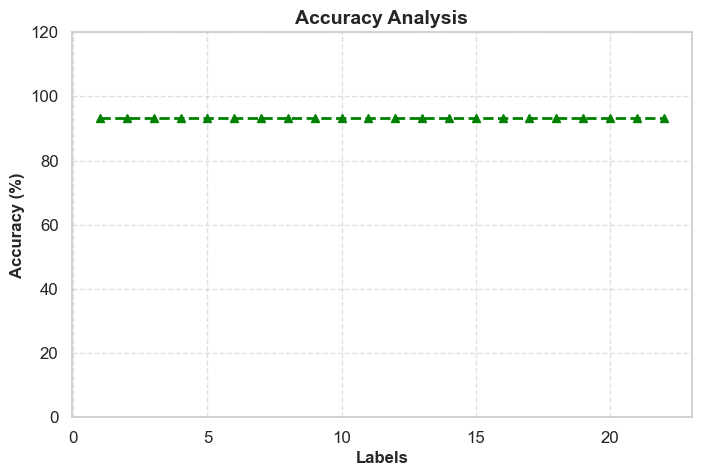

✅ Overall Accuracy of Model: 93.24%


In [15]:
# 8️⃣ Get classification metrics
report = classification_report(y_test, y_pred, output_dict=True)
labels = range(1, len(le.classes_) + 1)

# Extract per-class metrics
precision = [report[str(i)]['precision'] * 100 for i in range(len(le.classes_))]
recall = [report[str(i)]['recall'] * 100 for i in range(len(le.classes_))]
accuracy_value = accuracy_score(y_test, y_pred) * 100
accuracy = [accuracy_value] * len(le.classes_)

# Get crop names for x-axis
crop_names = le.classes_

# 9️⃣ Plot Precision Analysis
plt.figure(figsize=(8, 5))
plt.plot(labels, precision, marker='o', color='steelblue', linewidth=2)
plt.title("Precision Analysis", fontsize=14, fontweight='bold')
plt.xlabel("Labels", fontsize=12, fontweight='bold')
plt.ylabel("Precision (%)", fontsize=12, fontweight='bold')
plt.ylim(0, 120)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
# 🔟 Plot Recall Analysis
plt.figure(figsize=(8, 5))
plt.plot(labels, recall, marker='s', color='orange', linewidth=2)
plt.title("Recall Analysis", fontsize=14, fontweight='bold')
plt.xlabel("Labels", fontsize=12, fontweight='bold')
plt.ylabel("Recall (%)", fontsize=12, fontweight='bold')
plt.ylim(0, 120)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
# 1️⃣1️⃣ Plot Accuracy Analysis
plt.figure(figsize=(8, 5))
plt.plot(labels, accuracy, linestyle='--', color='green', linewidth=2, marker='^')
plt.title("Accuracy Analysis", fontsize=14, fontweight='bold')
plt.xlabel("Labels", fontsize=12, fontweight='bold')
plt.ylabel("Accuracy (%)", fontsize=12, fontweight='bold')
plt.ylim(0, 120)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print(f"✅ Overall Accuracy of Model: {accuracy_value:.2f}%")


In [16]:
#  Take user input for prediction
print("\n🌾 Enter values for prediction:")

user_input = []
for feature in X.columns:
    value = float(input(f"Enter {feature}: "))
    user_input.append(value)

# ✅ Convert input to DataFrame with same feature names
user_df = pd.DataFrame([user_input], columns=X.columns)

# ✅ Scale and predict safely
user_input_scaled = scaler.transform(user_df)
predicted_crop = label_encoder.inverse_transform(model.predict(user_input_scaled))[0]

print("\n🌱 Recommended Crop:", predicted_crop)



🌾 Enter values for prediction:


Enter N:  90
Enter P:  40
Enter K:  50
Enter temperature:  22
Enter humidity:  85
Enter ph:  6
Enter rainfall:  230



🌱 Recommended Crop: rice
